In [4]:
import pandas as pd
import datetime

# Load the Golden.csv file into a Pandas dataframe
df = pd.read_csv('C:\\Users\\PRADNYA\\Downloads\\Goldn.csv')

# Check the column names in the dataframe
print(df.columns)

# Convert the timestamp column to a datetime object
df['time'] = pd.to_datetime(df['time'])

# Convert the datetime object to Unix time and store it in a new column
df['unix_time'] = df['time'].apply(lambda x: int(x.timestamp()))

# Save the new dataframe with the Unix time feature as a new CSV file
df.to_csv('C:\\Users\\PRADNYA\\Desktop\\handwritten digit classification\\Golden_Time.csv', index=False)


Index(['time', 'latitude', 'longitude', 'depth', 'mag'], dtype='object')


Accuracy: 0.8604651162790697
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.287362 to fit



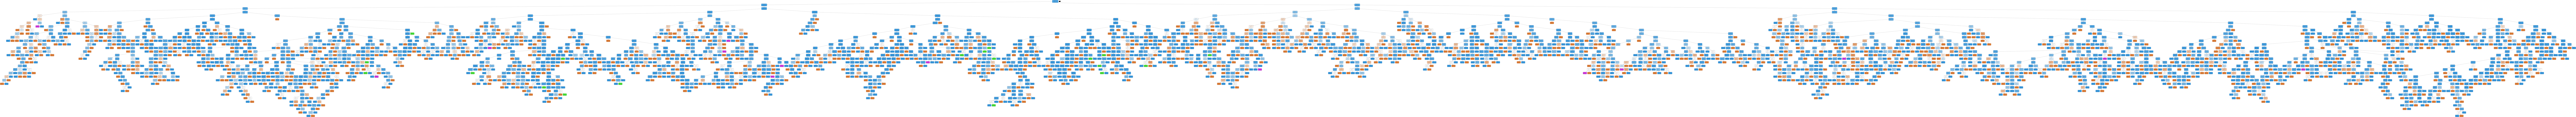

In [6]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Load the dataset into a pandas dataframe
df = pd.read_csv('C:\\Users\\PRADNYA\\Desktop\\Golden_new.csv')

# Create a new column 'magnitude_category' based on the magnitude values
df['magnitude_category'] = pd.cut(df['magnitude'], bins=[0, 3, 5, 7, 10], labels=['Low', 'Moderate', 'High', 'Very high'])

# Split the dataset into features and target variable
X = df.drop(['magnitude', 'magnitude_category'], axis=1)
y = df['magnitude_category']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
dt_clf = DecisionTreeClassifier()

# Train the classifier on the training set
dt_clf.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred = dt_clf.predict(X_test)

# Print the accuracy of the classifier
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Generate a visualization of the decision tree
dot_data = export_graphviz(dt_clf, out_file=None, feature_names=X.columns, class_names=['Low', 'Moderate', 'High', 'Very high'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


Accuracy: 0.8586623400036055
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.293685 to fit



C:\Users\PRADNYA\AppData\Local\Temp\ipykernel_34392\2570737425.py:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)
C:\PYTHON 3.10\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 69.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\PYTHON 3.10\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 99.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\PYTHON 3.10\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 97.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


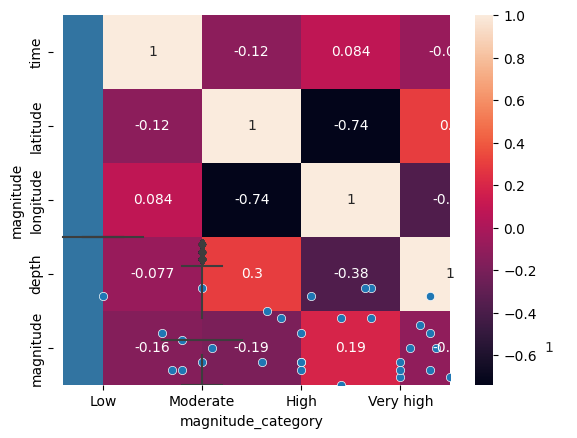

C:\PYTHON 3.10\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 78.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\PYTHON 3.10\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 99.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\PYTHON 3.10\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 97.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


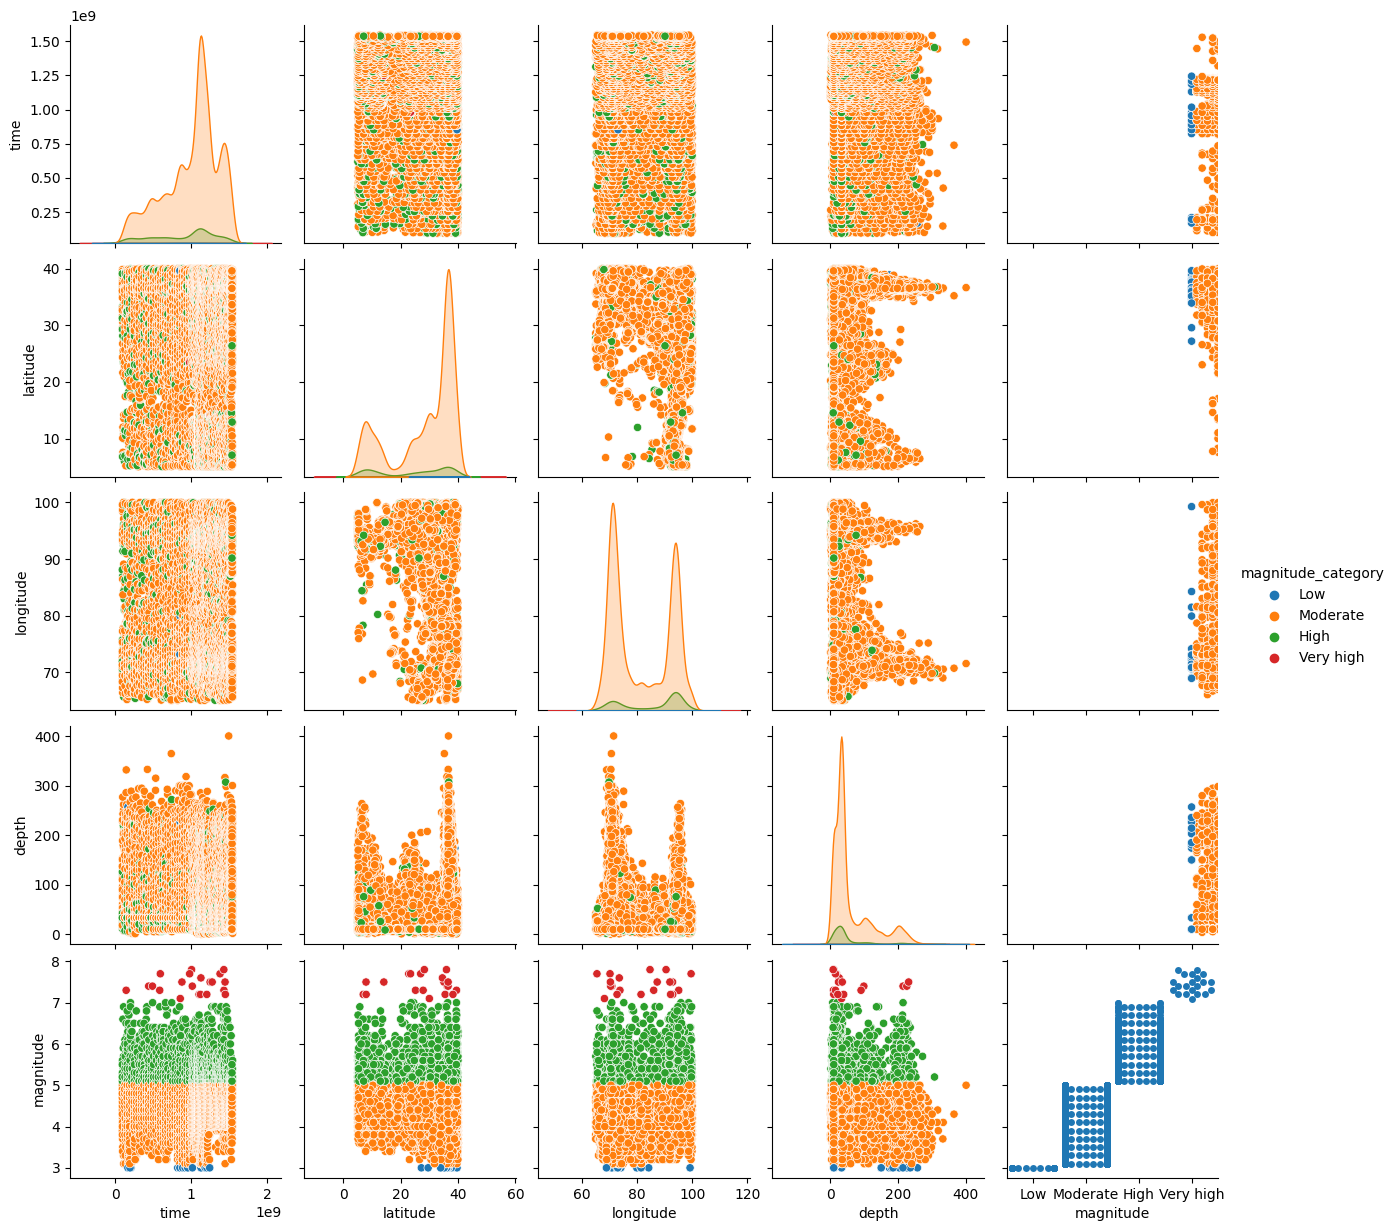

In [10]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a pandas dataframe
df = pd.read_csv('C:\\Users\\PRADNYA\\Desktop\\Golden_new.csv')

# Create a new column 'magnitude_category' based on the magnitude values
df['magnitude_category'] = pd.cut(df['magnitude'], bins=[0, 3, 5, 7, 10], labels=['Low', 'Moderate', 'High', 'Very high'])

# Split the dataset into features and target variable
X = df.drop(['magnitude', 'magnitude_category'], axis=1)
y = df['magnitude_category']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
dt_clf = DecisionTreeClassifier()

# Train the classifier on the training set
dt_clf.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred = dt_clf.predict(X_test)

# Print the accuracy of the classifier
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Generate a visualization of the decision tree
dot_data = export_graphviz(dt_clf, out_file=None, feature_names=X.columns, class_names=['Low', 'Moderate', 'High', 'Very high'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Show a bar plot of the target variable
sns.countplot(x=y, data=df)

# Show a heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True)

# Show a scatter plot of magnitude vs depth
sns.scatterplot(x='depth', y='magnitude', data=df)

# Show a box plot of magnitude by magnitude category
sns.boxplot(x='magnitude_category', y='magnitude', data=df)

# Show a pair plot of all features
sns.pairplot(df, hue='magnitude_category')

# Show a swarm plot of magnitude by magnitude category
sns.swarmplot(x='magnitude_category', y='magnitude', data=df)

plt.show()


In [ ]:
# Plot the confusion matrix
import seaborn as sns
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the feature importances
importances = pd.Series(data=dt_clf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values()
plt.title('Feature Importances')
plt.barh(importances_sorted.index, importances_sorted.values)
plt.show()

# Plot the decision tree
dot_data = export_graphviz(dt_clf, out_file=None, feature_names=X.columns, class_names=['Low', 'Moderate', 'High', 'Very high'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('decision_tree.png')
Image(filename='decision_tree.png')
